# Activation Function
In artificial neural networks (ANNs), the activation function is a mathematical “gate” in between the input feeding the current neuron and its output going to the next layer [1].

The activation functions are at the very core of Deep Learning. They determine the output of a model, its accuracy, and computational efficiency. In some cases, activation functions have a major effect on the model’s ability to converge and the convergence speed.

# Types
1. Step Function
2. Sigmoid (Logistic)
3. Hyperbolic Tangent (Tanh)
4. Rectified Linear Unit (ReLU)
5. Leaky ReLU
6. Parametric Leaky ReLU (PReLU)
7. Exponential Linear Units (ELU)
8. Scaled Exponential Linear Unit (SELU)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_x = np.linspace(-7, 7, 200)
input_x[:5]  , input_x[-5:]

(array([-7.        , -6.92964824, -6.85929648, -6.78894472, -6.71859296]),
 array([6.71859296, 6.78894472, 6.85929648, 6.92964824, 7.        ]))

In [3]:
def derivative(f, x, eps=0.000001):
    return (f(x + eps) - f(x - eps))/(2 * eps) 

In [44]:
def plot_activation_func(func_name ,function , input_x   , axis ):
    plt.subplot(1,2,1)
    
    # coordinate 
    # plt.plot([-7, 7], [0, 0], 'k-', linewidth=1)
    # plt.plot([-5, 5], [-1, -1], 'k--', linewidth=1)
    # plt.plot([0, 0], [-2.2, 3.2], 'k-', linewidth=1)
    # plt.plot([-7,7], [1,1], 'k--', linewidth=1)
    
    # plt.plot([-7, 7], [0, 0], 'k-', linewidth=1)
    # plt.plot([0, 0], [-2.2, 5], 'k-', linewidth=1)
    # plt.plot([-5,5], [0,0], 'k-')
    # plt.plot([0,0], [-0.5, 5], 'k-')

    # Plot function
    output_y = [function(x) for x in input_x]
    plt.plot(input_x , output_y ,  "b-", linewidth=2, label=func_name)
    
    plt.grid(True)
    plt.title(func_name +  " activation function", fontsize=14)
    # plt.axis(axis)
    
def plot_derivative(func_name ,function , input_x  , axis ):
    plt.subplot(1,2,2)
    # plt.plot([-7, 7], [0, 0], 'k-', linewidth=1)
    # plt.plot([0, 0], [-2.2, 5], 'k-', linewidth=1)
    
    output_y = [derivative(function, x) for x in input_x]
    
    plt.plot(input_x ,output_y , "b-", linewidth=2, label=func_name)
    plt.grid(True)
    plt.title("Derivative", fontsize=14)
    # plt.axis(axis)
    
def plot_func(func_name ,function ,  input_x , axis ):
    plt.figure(figsize=(11,4))
    plot_activation_func(func_name , function , input_x ,axis )
    plot_derivative(func_name ,function , input_x  , axis)
    plt.show()
    
    
    

# 1.Step Function

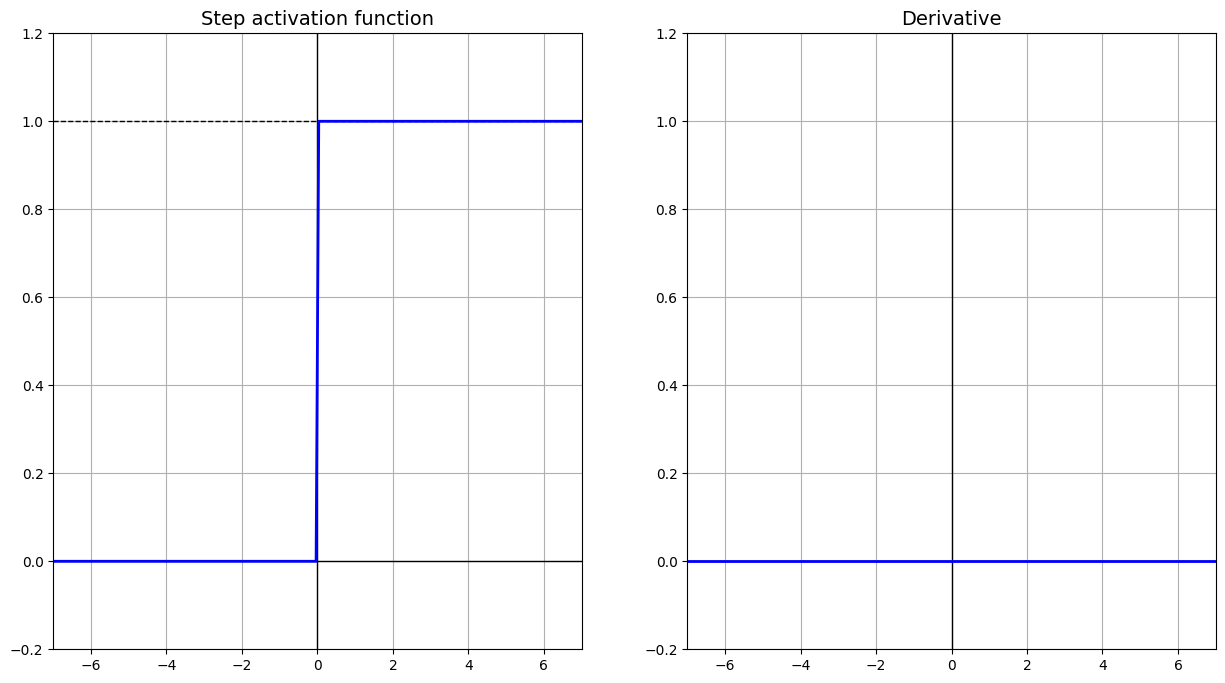

In [5]:
def step_f(x):
    return  1 if x >= 0 else 0

plot_func('Step' , step_f , input_x)

# 2. Sigmoid Function

The sigmoid activation function is a popular choice for the nonlinear activation function for neural networks. One reason it’s popular is that it has output values between 0 and 1, which mimic probability values.
* Hence it is used to convert the real-valued output of a linear layer to a probability, which can be used as a probability output. This also makes it an important part of logistic regression methods, which can be used directly for binary classification.

The sigmoid function is commonly represented by 
 1 / (1 + e^-y)
 

In [18]:
def sigmoid(x):return (1/(1 + np.exp(-x) ))

for x in [-100 , -10 , -4 , -1 ,0 , 1  , 4 , 10 , 100]:
    print( x ,'-' ,  sigmoid(x))

-100 - 3.7200759760208356e-44
-10 - 4.5397868702434395e-05
-4 - 0.01798620996209156
-1 - 0.2689414213699951
0 - 0.5
1 - 0.7310585786300049
4 - 0.9820137900379085
10 - 0.9999546021312976
100 - 1.0


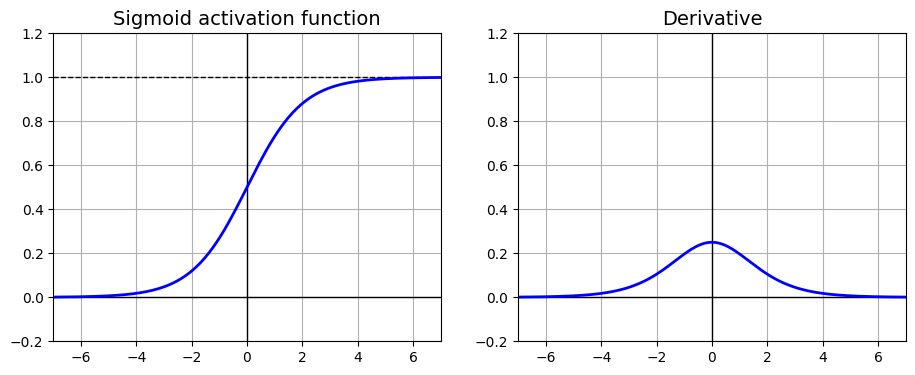

In [9]:
plot_func('Sigmoid' , sigmoid , input_x , axis = [-7, 7, -0.2, 1.2])

Here, you can observe that the gradient of the sigmoid function is always between 0 and 0.25. And as the 
 tends to positive or negative infinity, the gradient tends to zero. This could contribute to the vanishing gradient problem, meaning when the inputs are at some large magnitude of 
 (e.g., due to the output from earlier layers), the gradient is too small to initiate the correction.

# Gradient Vanishing Problem
Vanishing gradient is a problem because the chain rule is used in backpropagation in deep neural networks. Recall that in neural networks, the gradient (of the loss function) at each layer is the gradient at its subsequent layer multiplied by the gradient of its activation function. As there are many layers in the network, if the gradient of the activation functions is less than 1, the gradient at some layer far away from the output will be close to zero. And any layer with a gradient close to zero will stop the gradient propagation further back to the earlier layers.

Since the sigmoid function is always less than 1, a network with more layers would exacerbate the vanishing gradient problem. Furthermore, there is a saturation region where the gradient of the sigmoid tends to 0, which is where the magnitude of 
 is large. So, if the output of the weighted sum of activations from previous layers is large, then you would have a very small gradient propagating through this neuron as the derivative of the activation 
 with respect to the input to the activation function would be small (in the saturation region).

In [13]:
from tensorflow.keras.activations import sigmoid
import tensorflow as tf
input_array = tf.constant([-1, 0, 1], dtype=tf.float32)
print (sigmoid(input_array))

tf.Tensor([0.26894143 0.5        0.7310586 ], shape=(3,), dtype=float32)


# 3. Hyperbolic Tangent Function
Another activation function to consider is the tanh activation function, also known as the hyperbolic tangent function. It has a larger range of output values compared to the sigmoid function and a larger maximum gradient. The tanh function is a hyperbolic analog to the normal tangent function for circles that most people are familiar with.

In [19]:
def tanh(x):
    return  np.tanh(x)

for x in [-100 , -10 , -4 , -1 ,0 , 1  , 4 , 10 , 100]:
    print( x ,'-' ,  tanh(x))

-100 - -1.0
-10 - -0.9999999958776927
-4 - -0.999329299739067
-1 - -0.7615941559557649
0 - 0.0
1 - 0.7615941559557649
4 - 0.999329299739067
10 - 0.9999999958776927
100 - 1.0


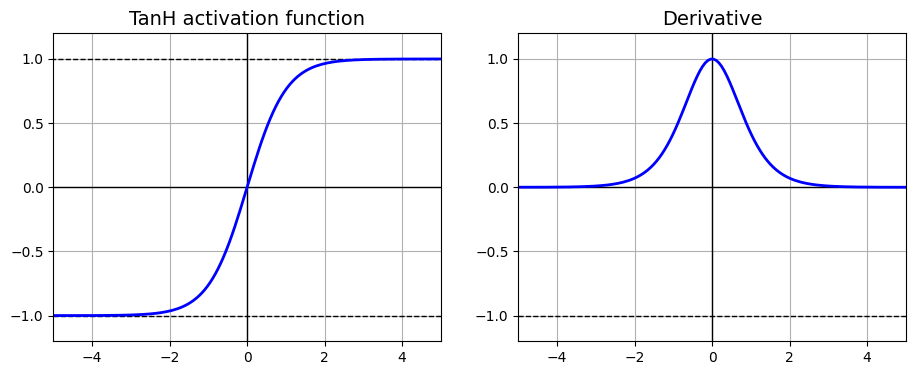

In [26]:
plot_func('TanH' , tanh , input_x , axis = [-5, 5, -1.2, 1.2])

Notice that the gradient now has a maximum value of 1, compared to the sigmoid function, where the largest gradient value is 0. This makes a network with tanh activation less susceptible to the vanishing gradient problem. However, the tanh function also has a saturation region, where the value of the gradient tends toward as the magnitude of the input 
 gets larger.

In [ ]:

import tensorflow as tf
from tensorflow.keras.activations import tanh
 
input_array = tf.constant([-1, 0, 1], dtype=tf.float32)
print (tanh(input_array))

# 4. Rectified Linear Unit (ReLU)
* It has become popular recently due to its relatively simple computation.
* This helps to speed up neural networks and seems to get empirically good performance, which makes it a good starting choice for the activation function.
* The ReLU function is a simple max(0,x)  function, which can also be thought of as a piecewise function with all inputs less than 0 mapping to 0 and all inputs greater than or equal to 0 mapping back to themselves (i.e., identity function). Graphically,



In [28]:
def relu(x) :
    return max(0,x)

In [29]:
for x in [-100 , -10 , -4 , -1 ,0 , 1  , 4 , 10 , 100]:
    print( x ,'-' ,  relu(x))

-100 - 0
-10 - 0
-4 - 0
-1 - 0
0 - 0
1 - 1
4 - 4
10 - 10
100 - 100


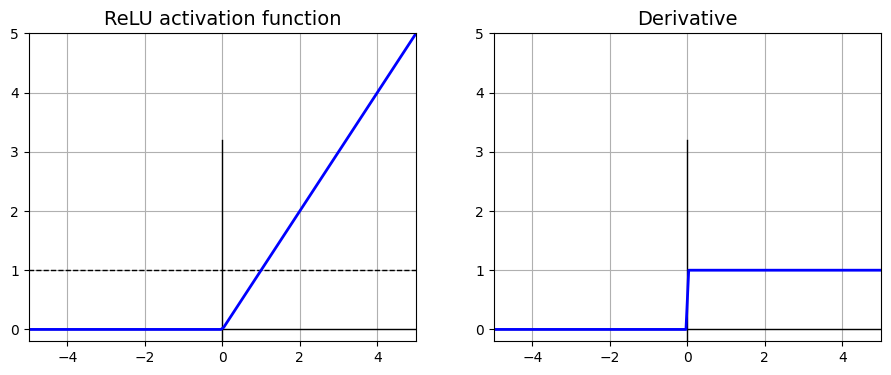

In [31]:
plot_func('ReLU' , relu , input_x , axis = [-5, 5, -0.2, 5])

Notice that the gradient of ReLU is 1 whenever the input is positive, which helps address the vanishing gradient problem. However, whenever the input is negative, the gradient is 0. This can cause another problem, the dead neuron/dying ReLU problem, which is an issue if a neuron is persistently inactivated.

In this case, the neuron can never learn, and its weights are never updated due to the chain rule as it has a 0 gradient as one of its terms. If this happens for all data in your dataset, then it can be very difficult for this neuron to learn from your dataset unless the activations in the previous layer change such that the neuron is no longer “dead.”

In [33]:
from tensorflow.keras.activations import relu

z = tf.constant([-20, -1, 0, 1.2], dtype=tf.float32)
output = relu(z)
output.numpy()

array([0. , 0. , 0. , 1.2], dtype=float32)

# 5. Leaky Relu

In [34]:
def leaky_relu(x , alpha=0.05):
    return max(alpha *x, x)

In [36]:
for x in [-100 , -10 , -4 , -1 ,0 , 1  , 4 , 10 , 100]:
    print( x ,'-' ,  leaky_relu(x))

-100 - -5.0
-10 - -0.5
-4 - -0.2
-1 - -0.05
0 - 0.0
1 - 1
4 - 4
10 - 10
100 - 100


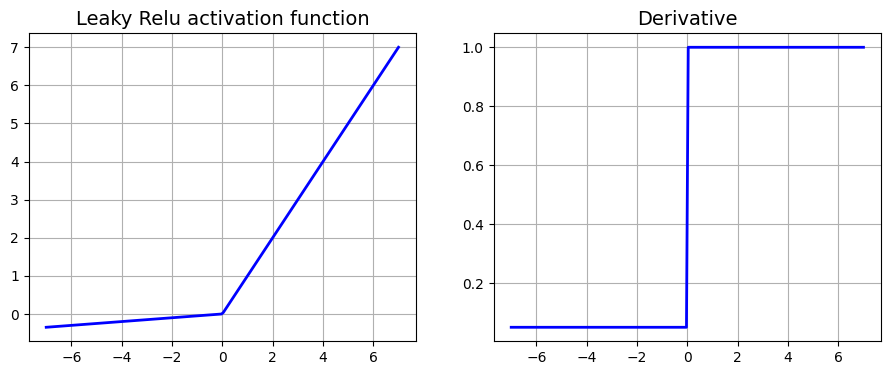

In [45]:
plot_func('Leaky Relu' , leaky_relu , input_x , axis = [-5,5,-0.05, 1.2])